In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sn

In [18]:
df = pd.read_csv('WisconsinDiagnosticBreastCancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
df.drop('id', axis=1, inplace=True)
df.replace('M',1, inplace=True)
df.replace('B',0, inplace=True)
print(df)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010  

In [35]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [32]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0] 
print(X.head())
print(y.head)

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

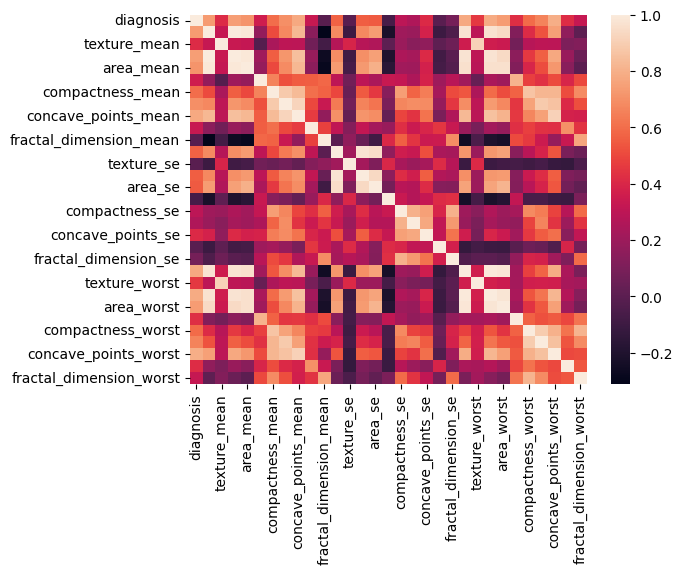

In [49]:
matrix = df.corr()
heat=sn.heatmap(data=matrix)
plt.show()

In [50]:
X_train_orig, X_temp_orig, y_train_orig, y_temp_orig = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_valid_orig, X_test_orig, y_valid_orig, y_test_orig = train_test_split(X_temp_orig, y_temp_orig, test_size=0.5, stratify=y_temp_orig, random_state=42)

In [58]:
X_train_orig['diagnosis']=y_train_orig
X_valid_orig['diagnosis']=y_valid_orig
X_test_orig['diagnosis']=y_test_orig

In [59]:
X_train_orig.to_csv('WDBC_Train.csv')
X_valid_orig.to_csv('WDBC_Validation.csv')
X_test_orig.to_csv('WDBC_Test.csv')

In [60]:
print(X_train_orig)
print(X_valid_orig)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
65        14.780         23.94           97.40      668.3          0.11720   
470        9.667         18.49           61.49      289.1          0.08946   
486       14.640         16.85           94.21      666.0          0.08641   
389       19.550         23.21          128.90     1174.0          0.10100   
473       12.270         29.97           77.42      465.4          0.07699   
..           ...           ...             ...        ...              ...   
192        9.720         18.22           60.73      288.1          0.06950   
37        13.030         18.42           82.61      523.8          0.08983   
415       11.890         21.17           76.39      433.8          0.09773   
458       13.000         25.13           82.61      520.2          0.08369   
476       14.200         20.53           92.41      618.4          0.08931   

     compactness_mean  concavity_mean  concave_points_mean  sym